# Capstone 1:  Exercise 5.4.5:  v3

# Wrangle

This notebook is my first look at the Ames data set.  

In this notebook, I'm looking to:

* Get a feel for how 'clean' the data set is
* Do any cleaning that seems that's needed right now
    * Fix index
    * Fix a few dates
* Get a handle on nulls
    * ID them
    * Decide if cleaning seems necessary
    * Clean where needed

## History

* v1:  Wrote first draft
* v2.1:  Separated out the cleaning from the analysis
* v2.2:  Added more cleaning.  Cleaned up as per AJ suggestions
* v3:  Did cleaning for modeling

## Step:  Set up

In [1]:
# Import key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set default seaborn style
sns.set()

## Step:  Load the data

In [3]:
df_org = pd.read_csv('data/train.csv')

## Step:  Inspect the data

In [4]:
# Question:  What shape is the frame?
df_org.shape

(1460, 81)

In [5]:
# Question:  What does the data frame look like?
df_org.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Question:  What are the columns?
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Takeaways

* About 1,500 observations
* About 80 variables + price
* All of the columns are nicely labeled
* There's an ID, starting at 1
* The sales info--the dependent variable--is on the far left
* Possible clean:  Reset index to ID:  DONE
* There are a number of date columns
* Possible clean:  Set date types
* Possible clean:  Explore and fix nulls
* Possible clean - move depdenent variables to column[0]: SKIP

## Clean 1:  Reset index

In [7]:
# Create a clean dataframe
df_cln = df_org.copy()

In [8]:
# Create an index off the 'Id' column and then drop the colum
df_cln.set_index(df_cln.Id, inplace=True)
df_cln.drop(columns=['Id'], inplace=True)

## Step:  Explore types

### What are the data types, generally? 

In [9]:
# What are the column types?
df_org.dtypes.unique().tolist()

[dtype('int64'), dtype('O'), dtype('float64')]

In [10]:
# How many of each type?
df_org.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

Takeaways:

* About 1/2 might be non-categorical, aka, ints and floats
* About 1/2 might be categorical - columns of mixed types - aka, object types


## Clean 2:  Dates and times


There are a few data and time columns.

But right now, they are just ints.

### Skip this for modeling

For modeling, it's better to have the original int values.

So skip this whole sectoin

In [11]:
# # Get the columns with with year, yr or month in title
# col_list = df_org.columns.tolist()
# col_list_dates = []
# for item in col_list:
#     if ('year' in item.lower()) or ('yr' in item.lower()) or ('mo' in item.lower()):
#         col_list_dates.append(item)
# print('There are {} columns with date-like names.'.format(len(col_list_dates)))
# print()
# print('These columns are:  {}'.format(col_list_dates))

Gameplan:

* Convert the first three to 'year aware'
* Create a date sold as datetime, plus a column that for year and for month that are dates

In [12]:
# # Convert the first three to a datetime-related type
# df_cln.YearBuilt = pd.to_datetime(df_cln.YearBuilt, format='%Y').dt.to_period('Y')
# df_cln.YearRemodAdd = pd.to_datetime(df_cln.YearRemodAdd, format='%Y').dt.to_period('Y')
# df_cln.GarageYrBlt = pd.to_datetime(df_cln.GarageYrBlt, format='%Y').dt.to_period('Y')

In [13]:
# # Confirm change
# L = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
# print('The original types are: ')
# print('{}'.format(df_org[L].dtypes))
# print()
# print('The clean types are: ')
# print('{}'.format(df_cln[L].dtypes))

In [14]:
# # Convert YrSold, MoSold

# # Create a full date column, assuming 1st of month
# df_cln['temp'] = df_cln.YrSold.astype(str) + '-' + df_cln.MoSold.astype(str) + '-01'
# df_cln['DateSold'] = pd.to_datetime(df_cln.temp)
# df_cln.drop(columns=['temp'], axis=1, inplace=True)

# # Overwrite the year as a datetime
# df_cln['YrSold'] = df_cln.DateSold.dt.to_period('Y')

# # Create a new YrMoSold as a datetime
# df_cln['YrMoSold'] = df_cln.DateSold.dt.to_period('M')

In [15]:
# # Confirm change
# L1 = ['YrSold', 'MoSold']
# L2 = ['DateSold', 'YrSold', 'YrMoSold', 'MoSold']
# print('The original types are: ')
# print('{}'.format(df_org[L1].dtypes))
# print()
# print('The clean types are: ')
# print('{}'.format(df_cln[L2].dtypes))

# # Note:  There really isn't a'month' not attached to a year as a date.

## Step:  Explore null values

### Are there many nulls, generally?

In [16]:
# What columns have nulls?
df_org_null = df_org.isnull().sum()
df_org_null[df_org_null > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [17]:
# Show the counts of columns by counts of nulls
df_org_null_count = df_org.isnull().sum().value_counts().sort_index()
df_org_null_count = pd.DataFrame(df_org_null_count)
df_org_null_count.columns = ['column_count']
df_org_null_count.index.name = 'null_count'
print(df_org_null_count)

            column_count
null_count              
0                     62
1                      1
8                      2
37                     3
38                     2
81                     5
259                    1
690                    1
1179                   1
1369                   1
1406                   1
1453                   1


In [18]:
# Make a table with colums, count of nulls and percent of nulls, dropping all the 0 nulls
df_org_all_null = df_org.isnull().sum()
df_org_all_null = pd.DataFrame(df_org_all_null)
df_org_all_null.columns = ['null_count']
df_org_all_null['null_pct'] = np.round((df_org_all_null.null_count / 1460) * 100, 2)
df_org_all_null.sort_values(by='null_pct', ascending=False, inplace=True)
print('There are {} columns in total'.format(len(df_org_all_null)))
print()
df_org_all_null_drop_zero = df_org_all_null[df_org_all_null.null_count > 0]
print('There are 19 that have nulls'.format(len(df_org_all_null_drop_zero)))
print()
print('Here are those columns with nulls:')
df_org_all_null_drop_zero

There are 81 columns in total

There are 19 that have nulls

Here are those columns with nulls:


,null_count,null_pct
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


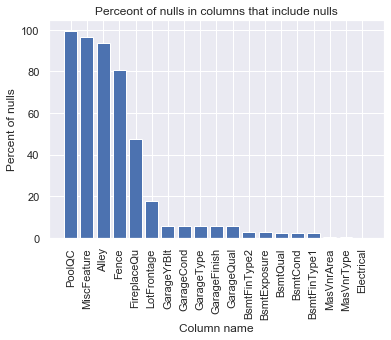

In [19]:
# Show a histogram of columns with nulls by count
_ = plt.bar(df_org_all_null_drop_zero.index, height=df_org_all_null_drop_zero.null_pct) 
_ = plt.xlabel('Column name')
_ = plt.ylabel('Percent of nulls')
_ = plt.title('Perceont of nulls in columns that include nulls')
_ = plt.xticks(rotation=90)
_ = plt.show()

Takeaways:
    
* Most--about 75%--of the columns have no nulls.  Aka, very clean data
* There are 11 columns with more than 3% nulls (aka, 50 nulls)
* There are 5 columns with more than 33% null (500 nulls)

In [20]:
# Is the dependent variable ever null?
df_org.SalePrice.isnull().sum()

0

Takeaway:

* The dependent variable is not null!

### Look at the nulls by type:  non-categorical

In [21]:
# Filter down to non-categorical columns
df_org_no_cat = df_org.select_dtypes(include=['int64', 'float64'])

In [22]:
# Make a table with colums, count of nulls and percent of nulls, dropping all the 0 nulls
df_org_no_cat_null = df_org_no_cat.isnull().sum()
df_org_no_cat_null = pd.DataFrame(df_org_no_cat_null)
df_org_no_cat_null.columns = ['null_count']
df_org_no_cat_null['null_pct'] = np.round((df_org_no_cat_null.null_count / 1460) * 100, 2)
df_org_no_cat_null.sort_values(by='null_pct', ascending=False, inplace=True)
print('There are {} columns that are of type ints or floats'.format(len(df_org_no_cat_null)))
print()
df_org_no_cat_null_drop_zero = df_org_no_cat_null[df_org_no_cat_null.null_count > 0]
print('There are {} non-categorical columns that have nulls'.format(len(df_org_no_cat_null_drop_zero)))
print()
print('Here are those columns with nulls:')
df_org_no_cat_null_drop_zero

There are 38 columns that are of type ints or floats

There are 3 non-categorical columns that have nulls

Here are those columns with nulls:


,null_count,null_pct
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55


Takeways:
    
* The 3 non-categorical variables with null values are ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
* The amount of nulls are:  17%, 5% and .5% respectively
* LATER:  Figure out how to impute the values

In [23]:
# Look at how the nulls are represented in these three column
print('LotFrontage')
print(df_org.LotFrontage[df_org.LotFrontage.isnull()].unique())
print()
print('GarageYrBlt')
print(df_org.GarageYrBlt[df_org.GarageYrBlt.isnull()].unique())
print()
print('MasVnrArea')
print(df_org.MasVnrArea[df_org.MasVnrArea.isnull()].unique()) 

LotFrontage
[nan]

GarageYrBlt
[nan]

MasVnrArea
[nan]


Takeways:

* If I'm using isnull, of course, the values are represented as Nan, of course.  
* In the raw data, I think they are 'NA' as text.

### Clean 3:  Address non-categorical nulls

#### Clean LotFrontage from null to 0

* This is defined as, Linear feet of street connected to property
* To me, it make sense to have a nan.  That is, there is no connection to the street
* Sure, this would be an odd property.  But it could happen.
* ALso, I don't see any 0 values in the column.  The min value is 21
* Fix, overwrite with 0

In [24]:
# Count the nulls in the original data frame
df_org.LotFrontage.isna().sum()

259

In [25]:
# Count the nulls in the original data frame
df_cln.LotFrontage.isna().sum()

259

In [26]:
# Get the ID that I'm going to clean
check_1 = df_org.LotFrontage[df_org.LotFrontage.isna()].index.tolist()

In [27]:
# Fill with 0
df_cln.LotFrontage = df_cln.LotFrontage.fillna(0)

In [28]:
# Look at the values to confirm that cleaned
# Adjust for difference between index in origianl and index in clean
for index_org in check_1:
    index_cln = index_org + 1
    print(index_cln, df_org.LotFrontage[index_org], df_cln.LotFrontage[index_cln])

8 nan 0.0
13 nan 0.0
15 nan 0.0
17 nan 0.0
25 nan 0.0
32 nan 0.0
43 nan 0.0
44 nan 0.0
51 nan 0.0
65 nan 0.0
67 nan 0.0
77 nan 0.0
85 nan 0.0
96 nan 0.0
101 nan 0.0
105 nan 0.0
112 nan 0.0
114 nan 0.0
117 nan 0.0
121 nan 0.0
127 nan 0.0
132 nan 0.0
134 nan 0.0
137 nan 0.0
148 nan 0.0
150 nan 0.0
153 nan 0.0
154 nan 0.0
161 nan 0.0
167 nan 0.0
170 nan 0.0
171 nan 0.0
178 nan 0.0
181 nan 0.0
187 nan 0.0
192 nan 0.0
204 nan 0.0
208 nan 0.0
209 nan 0.0
215 nan 0.0
219 nan 0.0
222 nan 0.0
235 nan 0.0
238 nan 0.0
245 nan 0.0
250 nan 0.0
270 nan 0.0
288 nan 0.0
289 nan 0.0
294 nan 0.0
308 nan 0.0
309 nan 0.0
311 nan 0.0
320 nan 0.0
329 nan 0.0
331 nan 0.0
336 nan 0.0
343 nan 0.0
347 nan 0.0
348 nan 0.0
352 nan 0.0
357 nan 0.0
361 nan 0.0
362 nan 0.0
365 nan 0.0
367 nan 0.0
370 nan 0.0
371 nan 0.0
376 nan 0.0
385 nan 0.0
393 nan 0.0
394 nan 0.0
405 nan 0.0
406 nan 0.0
413 nan 0.0
422 nan 0.0
427 nan 0.0
448 nan 0.0
453 nan 0.0
458 nan 0.0
459 nan 0.0
460 nan 0.0
466 nan 0.0
471 nan 0.0
485 nan

NOTE:

* The index in the original isn't the same as the index in the cleaned
* Aka, the original has index which is -1 (aka, zero based) compared to ID
* Aka, the clean has the ID as the index

#### Clean MasVnrArea from null to 0

* This is, Masonry veneer area in square feet
* For those with null, it looks like there's no masonry
* But there's also values with zero.
* Here, let's place with zero

In [29]:
# Get the ID that I'm going to clean
check_2 = df_org.MasVnrArea[df_org.MasVnrArea.isna()].index.tolist()

# Fill with 0
df_cln.MasVnrArea = df_cln.MasVnrArea.fillna(0)

# Look at the values to confirm that cleaned
# Adjust for difference between index in origianl and index in clean
for index_org in check_2:
    index_cln = index_org + 1
    print(index_cln, df_org.MasVnrArea[index_org], df_cln.MasVnrArea[index_cln])

235 nan 0.0
530 nan 0.0
651 nan 0.0
937 nan 0.0
974 nan 0.0
978 nan 0.0
1244 nan 0.0
1279 nan 0.0


Don't clean GarageYrBlt, keep as null

* This column is, year garage was built
* I've already converted this to a date time type
* This represents homes without garages
* These should be kept as nan
* Unless a specific model can't deal with the nan

### Look at the nulls by types:  categorical

In [30]:
# Filter down to non-categorical columns
df_org_cat = df_org.select_dtypes(include=['object'])

In [31]:
# Make a table with colums, count of nulls and percent of nulls
df_org_cat_null = df_org_cat.isnull().sum()
df_org_cat_null = pd.DataFrame(df_org_cat_null)
df_org_cat_null.columns = ['null_count']
df_org_cat_null['null_pct'] = np.round((df_org_cat_null.null_count / 1460) * 100, 2)
df_org_cat_null.sort_values(by='null_pct', ascending=False, inplace=True)
print('There are {} columns of type object'.format(len(df_org_cat_null)))
df_org_cat_null_drop_zero = df_org_cat_null[df_org_cat_null.null_count > 0]
print()
print('There are {} non-categorical columns with nulls'.format(len(df_org_cat_null_drop_zero)))
print()
print('Here are the non-categorical columns with nulls:')
df_org_cat_null_drop_zero

There are 43 columns of type object

There are 16 non-categorical columns with nulls

Here are the non-categorical columns with nulls:


,null_count,null_pct
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
GarageType,81,5.55
GarageCond,81,5.55
GarageQual,81,5.55
GarageFinish,81,5.55
BsmtFinType2,38,2.60


Takeaways:

* About 1/3rd of the non-categorical columns have nulls
* A handful (aka, 5) of these columns have 'lots' of nulls - about 1/2 or more
* About 10 of these columns are a 'few' nulls -- about less than 5%

### What are the values of nulls types: categorical

What does it look like null means in the categorical columns?
Are there other values in non-categorical that represent nulls?  Aka, is there an additional category that means null?

In [32]:
# Print out unqiue values in each categorical columns, in alphabetical order, with nan
col_list = df_org_cat_null_drop_zero.index.tolist()
for col in col_list:
    values = df_org[col].unique().tolist()
    # Needed to convert to string and sorts
    values2 = []
    for i in values:
        values2.append(str(i))
    values2.sort()
    print('{:<20}'.format(col), end=' ')
    for i in values2:
        print('{}'.format(i), end=' ')
    print()

PoolQC               Ex Fa Gd nan 
MiscFeature          Gar2 Othr Shed TenC nan 
Alley                Grvl Pave nan 
Fence                GdPrv GdWo MnPrv MnWw nan 
FireplaceQu          Ex Fa Gd Po TA nan 
GarageType           2Types Attchd Basment BuiltIn CarPort Detchd nan 
GarageCond           Ex Fa Gd Po TA nan 
GarageQual           Ex Fa Gd Po TA nan 
GarageFinish         Fin RFn Unf nan 
BsmtFinType2         ALQ BLQ GLQ LwQ Rec Unf nan 
BsmtExposure         Av Gd Mn No nan 
BsmtFinType1         ALQ BLQ GLQ LwQ Rec Unf nan 
BsmtQual             Ex Fa Gd TA nan 
BsmtCond             Fa Gd Po TA nan 
MasVnrType           BrkCmn BrkFace None Stone nan 
Electrical           FuseA FuseF FuseP Mix SBrkr nan 


Analysis:

* I'm looking for two things.
* Was the author clear about what nan means?
* Also, is there a category like nan?  (And the presence of nan + this other category might be odd)

With these 14, nan has a valid meaning (and we'll keep as null)

* PoolQC:  No other category.  nan has a meaning.  Means, no pool
* MiscFeature: THis is OK.  Other is other feature.  Nan is no misc features
* Alley: Same, no alley
* Fence: Same, no fence
* FireplaceQu:  Same, no fireplace
* GarageType: Same, no garage
* GarageCond:  Same
* GarageQual:  Same
* GarageFinish:  Same
* BsmtFinType2:  Same, no basement
* BsmtExposure:  This is OK.  No = no exposure.  Nan = no basement
* BsmtFinType1:  Same
* BsmtQual:  Same
* BsmtCond: same


With these 14, with will keep the null.  Aka, no cleaning required


With two columns, the use of nan is different:

* MasVnrType:  
    * Here, there's a 'none' and a nan
    * But there's only 8 nan
    * My assumption is that these 8 nan should be done.
    
    
* Electrical:  
    * Here, nan has no meaning
    * But there's only 1 nan
    * For now, let's just take the most common value.

#### Clean last 2 non-categorical

In [33]:
# Address MasVnrType

# Get the list of values to be cleaned
check_MasVnrType = df_org.MasVnrType[df_org.MasVnrType.isna()].index.tolist()

 # Fill with 'None'
df_cln.MasVnrType = df_cln.MasVnrType.fillna('None')

# Look at the values to confirm that cleaned
# Adjust for difference between index in origianl and index in clean
for index_org in check_MasVnrType:
    index_cln = index_org + 1
    print(index_cln,  df_org.MasVnrType[index_org], df_cln.MasVnrType[index_cln])

235 nan None
530 nan None
651 nan None
937 nan None
974 nan None
978 nan None
1244 nan None
1279 nan None


In [34]:
# Address Electrical

# Look for most common values
df_org.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [35]:
# Get the list of values to be cleaned
check_Electrical = df_org.Electrical[df_org.Electrical.isna()].index.tolist()

 # Fill with 'None'
df_cln.Electrical = df_cln.Electrical.fillna('SBrkr')

# Check the values
# Adjust for difference between index in origianl and index in clean
for index_org in check_Electrical:
    index_cln = index_org + 1
    print(index_cln, df_org.Electrical[index_org], df_cln.Electrical[index_cln])

1380 nan SBrkr


## Conclusions

Takeaways:

* The data is very clean
* There are well-formed column headings
* The data set already is indexed--unique ID's for each observations
* There is a mix of categorical and non-categorical variables
* There are a few dates and years that can be converted over to datetimes.
* There are some, but not too many, nulls
* 'NA' is the character for null in raw data.  It's picked up a read_csv
* The dependent variable is never null.
* Most the nulls are correct.  With a meaning of 'None.'
* A few need to be cleaned


## Step:  Save the clean dataframe - v1

In [36]:
# Save as a picked dataframe
df_cln.to_pickle('data/df_cln_v1.pickle')

In [37]:
# Save as csv
df_cln.to_csv('data/df_cln_v1.csv')

## Step:  Additional cleaning for stats analysis

In the course of doing my statistical analysis, I realized that there's more cleaning to do.

* I need nulls to show up as a category, like 'No' or 'None' or the value already used by the column to enumerate not applicable
* I can process many categoricals as numerics if I convert ordinal categorical into ints


* I found a good example of this cleaning in the following Kaggle Kernal:
* 'A study on Regression applied to the Ames dataset' under the House Prices: Advanced Regression Techniques in Kaggle.
* I'm liberally borrowing from the author's code to make these cleanings.

In [38]:
# Further clean up nulls where NaN is really a category

# Alley : data description says NA means 'no alley access'
df_cln.loc[:, 'Alley'] = df_cln.loc[:, 'Alley'].fillna('None')
# BedroomAbvGr : NA most likely means 0
df_cln.loc[:, 'BedroomAbvGr'] = df_cln.loc[:, 'BedroomAbvGr'].fillna(0)
# BsmtQual etc : data description says NA for basement features is 'no basement'
df_cln.loc[:, 'BsmtQual'] = df_cln.loc[:, 'BsmtQual'].fillna('No')
df_cln.loc[:, 'BsmtCond'] = df_cln.loc[:, 'BsmtCond'].fillna('No')
df_cln.loc[:, 'BsmtExposure'] = df_cln.loc[:, 'BsmtExposure'].fillna('No')
df_cln.loc[:, 'BsmtFinType1'] = df_cln.loc[:, 'BsmtFinType1'].fillna('No')
df_cln.loc[:, 'BsmtFinType2'] = df_cln.loc[:, 'BsmtFinType2'].fillna('No')
df_cln.loc[:, 'BsmtFullBath'] = df_cln.loc[:, 'BsmtFullBath'].fillna(0)
df_cln.loc[:, 'BsmtHalfBath'] = df_cln.loc[:, 'BsmtHalfBath'].fillna(0)
df_cln.loc[:, 'BsmtUnfSF'] = df_cln.loc[:, 'BsmtUnfSF'].fillna(0)
# CentralAir : NA most likely means No
df_cln.loc[:, 'CentralAir'] = df_cln.loc[:, 'CentralAir'].fillna('N')
# Condition : NA most likely means Normal
df_cln.loc[:, 'Condition1'] = df_cln.loc[:, 'Condition1'].fillna('Norm')
df_cln.loc[:, 'Condition2'] = df_cln.loc[:, 'Condition2'].fillna('Norm')
# EnclosedPorch : NA most likely means no enclosed porch
df_cln.loc[:, 'EnclosedPorch'] = df_cln.loc[:, 'EnclosedPorch'].fillna(0)
# External stuff : NA most likely means average
df_cln.loc[:, 'ExterCond'] = df_cln.loc[:, 'ExterCond'].fillna('TA')
df_cln.loc[:, 'ExterQual'] = df_cln.loc[:, 'ExterQual'].fillna('TA')
# Fence : data description says NA means 'no fence'
df_cln.loc[:, 'Fence'] = df_cln.loc[:, 'Fence'].fillna('No')
# FireplaceQu : data description says NA means 'no fireplace'
df_cln.loc[:, 'FireplaceQu'] = df_cln.loc[:, 'FireplaceQu'].fillna('No')
df_cln.loc[:, 'Fireplaces'] = df_cln.loc[:, 'Fireplaces'].fillna(0)
# Functional : data description says NA means typical
df_cln.loc[:, 'Functional'] = df_cln.loc[:, 'Functional'].fillna('Typ')
# GarageType etc : data description says NA for garage features is 'no garage'
df_cln.loc[:, 'GarageType'] = df_cln.loc[:, 'GarageType'].fillna('No')
df_cln.loc[:, 'GarageFinish'] = df_cln.loc[:, 'GarageFinish'].fillna('No')
df_cln.loc[:, 'GarageQual'] = df_cln.loc[:, 'GarageQual'].fillna('No')
df_cln.loc[:, 'GarageCond'] = df_cln.loc[:, 'GarageCond'].fillna('No')
df_cln.loc[:, 'GarageArea'] = df_cln.loc[:, 'GarageArea'].fillna(0)
df_cln.loc[:, 'GarageCars'] = df_cln.loc[:, 'GarageCars'].fillna(0)
# HalfBath : NA most likely means no half baths above grade
df_cln.loc[:, 'HalfBath'] = df_cln.loc[:, 'HalfBath'].fillna(0)
# HeatingQC : NA most likely means typical
df_cln.loc[:, 'HeatingQC'] = df_cln.loc[:, 'HeatingQC'].fillna('TA')
# KitchenAbvGr : NA most likely means 0
df_cln.loc[:, 'KitchenAbvGr'] = df_cln.loc[:, 'KitchenAbvGr'].fillna(0)
# KitchenQual : NA most likely means typical
df_cln.loc[:, 'KitchenQual'] = df_cln.loc[:, 'KitchenQual'].fillna('TA')
# LotFrontage : NA most likely means no lot frontage
df_cln.loc[:, 'LotFrontage'] = df_cln.loc[:, 'LotFrontage'].fillna(0)
# LotShape : NA most likely means regular
df_cln.loc[:, 'LotShape'] = df_cln.loc[:, 'LotShape'].fillna('Reg')
# MasVnrType : NA most likely means no veneer
df_cln.loc[:, 'MasVnrType'] = df_cln.loc[:, 'MasVnrType'].fillna('None')
df_cln.loc[:, 'MasVnrArea'] = df_cln.loc[:, 'MasVnrArea'].fillna(0)
# MiscFeature : data description says NA means 'no misc feature'
df_cln.loc[:, 'MiscFeature'] = df_cln.loc[:, 'MiscFeature'].fillna('No')
df_cln.loc[:, 'MiscVal'] = df_cln.loc[:, 'MiscVal'].fillna(0)
# OpenPorchSF : NA most likely means no open porch
df_cln.loc[:, 'OpenPorchSF'] = df_cln.loc[:, 'OpenPorchSF'].fillna(0)
# PavedDrive : NA most likely means not paved
df_cln.loc[:, 'PavedDrive'] = df_cln.loc[:, 'PavedDrive'].fillna('N')
# PoolQC : data description says NA means 'no pool'
df_cln.loc[:, 'PoolQC'] = df_cln.loc[:, 'PoolQC'].fillna('No')
df_cln.loc[:, 'PoolArea'] = df_cln.loc[:, 'PoolArea'].fillna(0)
# SaleCondition : NA most likely means normal sale
df_cln.loc[:, 'SaleCondition'] = df_cln.loc[:, 'SaleCondition'].fillna('Normal')
# ScreenPorch : NA most likely means no screen porch
df_cln.loc[:, 'ScreenPorch'] = df_cln.loc[:, 'ScreenPorch'].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
df_cln.loc[:, 'TotRmsAbvGrd'] = df_cln.loc[:, 'TotRmsAbvGrd'].fillna(0)
# Utilities : NA most likely means all public utilities
df_cln.loc[:, 'Utilities'] = df_cln.loc[:, 'Utilities'].fillna('AllPub')
# WoodDeckSF : NA most likely means no wood deck
df_cln.loc[:, 'WoodDeckSF'] = df_cln.loc[:, 'WoodDeckSF'].fillna(0)

In [39]:
# Check 
i = 'PoolQC'
print('Before there were {} nulls'.format(df_org[i].isna().sum()))
print('After there were {} nulls'.format(df_cln[i].isna().sum()))
print('Before the values were: ', df_org[i].unique())
print('After the values were:  ', df_cln[i].unique())

Before there were 1453 nulls
After there were 0 nulls
Before the values were:  [nan 'Ex' 'Fa' 'Gd']
After the values were:   ['No' 'Ex' 'Fa' 'Gd']


In [40]:
# Convert categorial into ordinal where there's ordering
# Aka, Likert scale
# For example, where different quality levels

df_cln = df_cln.replace({'BsmtCond' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}})
df_cln = df_cln.replace({'BsmtExposure' : {'No' : 0, 'Mn' : 1, 'Av': 2, 'Gd' : 3}})
df_cln = df_cln.replace({'BsmtFinType1' : {'No' : 0, 'Unf' : 1, 'LwQ': 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6}})
df_cln = df_cln.replace({'BsmtFinType2' : {'No' : 0, 'Unf' : 1, 'LwQ': 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6}})
df_cln = df_cln.replace({'BsmtQual' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd' : 4, 'Ex' : 5}})
df_cln = df_cln.replace({'ExterCond' : {'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd': 4, 'Ex' : 5}})
df_cln = df_cln.replace({'ExterQual' : {'Po' : 1, 'Fa' : 2, 'TA': 3, 'Gd': 4, 'Ex' : 5}})
df_cln = df_cln.replace({'FireplaceQu' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}})
df_cln = df_cln.replace({'Functional' : {'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4, 'Mod': 5, 'Min2' : 6, 'Min1' : 7, 'Typ' : 8}})
df_cln = df_cln.replace({'GarageCond' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}})
df_cln = df_cln.replace({'GarageQual' : {'No' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}})
df_cln = df_cln.replace({'HeatingQC' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}})
df_cln = df_cln.replace({'KitchenQual' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}})
df_cln = df_cln.replace({'LandSlope' : {'Sev' : 1, 'Mod' : 2, 'Gtl' : 3}})
df_cln = df_cln.replace({'LotShape' : {'IR3' : 1, 'IR2' : 2, 'IR1' : 3, 'Reg' : 4}})
df_cln = df_cln.replace({'PavedDrive' : {'N' : 0, 'P' : 1, 'Y' : 2}})
df_cln = df_cln.replace({'PoolQC' : {'No' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}})
df_cln = df_cln.replace({'Street' : {'Grvl' : 1, 'Pave' : 2}})
df_cln = df_cln.replace({'Utilities' : {'ELO' : 1, 'NoSeWa' : 2, 'NoSewr' : 3, 'AllPub' : 4}})

In [41]:
# Check 
i = 'PoolQC'
print('Before: ', df_org[i].unique())
print('After:  ', df_cln[i].unique())

Before:  [nan 'Ex' 'Fa' 'Gd']
After:   [0 4 1 3]


In [42]:
# Check 
i = 'LotShape'
print('Before: ', df_org[i].unique())
print('After:  ', df_cln[i].unique())

Before:  ['Reg' 'IR1' 'IR2' 'IR3']
After:   [4 3 2 1]


## Step:  Save the clean dataframe as clean v2

In [43]:
# Save as a picked dataframe
df_cln.to_pickle('data/df_cln_v2.pickle')

In [44]:
# Save as csv
df_cln.to_csv('data/df_cln_v2.csv')

## Step:  Additional cleaning for modeling

In [45]:
# Double check for any null

df_cln.isnull().sum().sum()

81

In [46]:
# Confirm that last nulls are in GarageYrBlt

df_cln['GarageYrBlt'].isnull().sum()

81

In [47]:
# Get the indicies of GarageYrBlt that are null 

df_cln[df_cln['GarageYrBlt'].isnull()].index

Int64Index([  40,   49,   79,   89,   90,  100,  109,  126,  128,  141,  149,
             156,  164,  166,  199,  211,  242,  251,  288,  292,  308,  376,
             387,  394,  432,  435,  442,  465,  496,  521,  529,  534,  536,
             563,  583,  614,  615,  621,  636,  637,  639,  650,  706,  711,
             739,  751,  785,  827,  844,  922,  943,  955,  961,  969,  971,
             977, 1010, 1012, 1031, 1039, 1097, 1124, 1132, 1138, 1144, 1174,
            1180, 1219, 1220, 1235, 1258, 1284, 1324, 1326, 1327, 1338, 1350,
            1408, 1450, 1451, 1454],
           dtype='int64', name='Id')

In [48]:
df_cln.loc[:, 'GarageYrBlt'] = df_cln.loc[:, 'GarageYrBlt'].fillna(df_cln['YearBuilt'])

In [49]:
# Check a few rows

print(df_cln.iloc[40]['GarageYrBlt'])
print(df_cln.iloc[615]['GarageYrBlt'])
print(df_cln.iloc[1324]['GarageYrBlt'])

1965.0
1963.0
2007.0


## Step:  Save the clean dataframe as clean v3

In [50]:
# Save as a picked dataframe
df_cln.to_pickle('data/df_cln_v3.pickle')

In [51]:
# Save as csv
df_cln.to_csv('data/df_cln_v3.csv')